<a href="https://colab.research.google.com/github/GladwelWanjau/Week-8-Data-Science-Core-IP-/blob/main/Moringa_Data_Science_Core_Week_8_Independent_Project_Gladwel_Wanjau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question

The Research question in this project was to come up with a model that determines whether or not a patient has hypthyroid disease based on the symptoms they exhibit.


# Metric Of Success

Identify the factors that are most important in identifying hypothyroidisms and achieving a high accuracy score on the prediction of whether the patient has a disease or not.

# Understanding the Context

The data availed for this project was collected in a medical camp held by Nairobi Hospital in a bid to identify factors that cause hypothyroidsim.The target population was patients suffering from the thyroid disease. 

# Experimental Design

1.Loading the Dataset
2. Data exploration and cleaning
3.Conversion of data types
4.Modelling the data using decision trees and support Vector Machine.
5.Challenging the solution and making conclusions.

In [2]:
#Importing the relevant libraries
import numpy as np
import pandas as pd
import pandas_profiling as pp

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Data Exploration and Cleaning

In [3]:
#loading the data
data = pd.read_csv('hypothyroid.csv')

#displaying the dataset
data.head(5)


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [4]:
#Checking the number of columns and rows in the dataset
data.shape
#The data has 3163 rows and 26 columns.

(3163, 26)

In [5]:
#Checking the data type of each column in the dataset
data.info()
#All the data types are Object hence we will need to transform the variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [6]:
#Getting the summary statistics of the data
data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


**Getting the frequencies of the categorical variables.**

In [7]:
data['status'].value_counts()
#Out of the whole dataset most of the patients(3,012)tested negative while 151 patients turned out negative.

negative       3012
hypothyroid     151
Name: status, dtype: int64

In [9]:
data['sex'].value_counts()
#Females contributed the greater proportion of the population with 2,182 patients while males were 908.Additionally,48 people chose not to reveal their gender.

F    2182
M     908
?      73
Name: sex, dtype: int64

In [10]:
data['on_thyroxine'].value_counts()
#2,702 indicated that they had been on thyroxine and 461 indicated they had not been on thyroxine.

f    2702
t     461
Name: on_thyroxine, dtype: int64

In [11]:
data['query_on_thyroxine'].value_counts()
#3,108 indicated that they had query on thyroxine and 55 indicated they did not.

f    3108
t      55
Name: query_on_thyroxine, dtype: int64

In [12]:
data['on_antithyroid_medication'].value_counts()
#3,121 indicated that they were on antithyroid medication and 42 indicated they were not.

f    3121
t      42
Name: on_antithyroid_medication, dtype: int64

In [13]:
data['thyroid_surgery'].value_counts()

f    3059
t     104
Name: thyroid_surgery, dtype: int64

In [14]:
data['query_hypothyroid'].value_counts()

f    2922
t     241
Name: query_hypothyroid, dtype: int64

In [15]:
data['query_hyperthyroid'].value_counts()

f    2920
t     243
Name: query_hyperthyroid, dtype: int64

In [16]:
data['pregnant'].value_counts()

f    3100
t      63
Name: pregnant, dtype: int64

In [17]:
data['sick'].value_counts()

f    3064
t      99
Name: sick, dtype: int64

In [18]:
data['tumor'].value_counts()

f    3123
t      40
Name: tumor, dtype: int64

In [19]:
data['lithium'].value_counts()

f    3161
t       2
Name: lithium, dtype: int64

In [20]:
data['goitre'].value_counts()

f    3064
t      99
Name: goitre, dtype: int64

In [21]:
data['TSH_measured'].value_counts()

y    2695
n     468
Name: TSH_measured, dtype: int64

In [22]:
data['T3_measured'].value_counts()

y    2468
n     695
Name: T3_measured, dtype: int64

In [23]:
data['TT4_measured'].value_counts()

y    2914
n     249
Name: TT4_measured, dtype: int64

In [24]:
data['T4U_measured'].value_counts()

y    2915
n     248
Name: T4U_measured, dtype: int64

In [25]:
data['FTI_measured'].value_counts()

y    2916
n     247
Name: FTI_measured, dtype: int64

In [26]:
data['TBG_measured'].value_counts()

n    2903
y     260
Name: TBG_measured, dtype: int64

In [27]:
data.columns


Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [28]:
# Checking for unique values in all columns in the dataset
for uni in data.columns:
#   print(data.columns)
  print("\t")
  print(data[uni].unique())


	
['hypothyroid' 'negative']
	
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
	
['M' 'F' '?']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['f' 't']
	
['y' 'n']
	
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43' '12' '11' '55' 

In [29]:
#checking for null values in the dataset
data.isnull().sum().sort_values(ascending=False)
#There exists 187 missing values in the Age column and 25 in the Sex column.

TBG                          0
TBG_measured                 0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
status                       0
dtype: int64

In [30]:
#Replacing ? values with nan 
data.replace('?',np.nan,inplace=True)
data

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,NaN
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,NaN
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,NaN
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,NaN


In [31]:
# Converting the numerical columns to  numerical data type-Float
data[["age", "TSH", "T3", "TT4", "T4U", "FTI","TBG"]] = data[["age", "TSH", "T3", "TT4", "T4U", "FTI","TBG"]].astype(float)

In [32]:
# Converting to categorical columns to category data type
data[["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]] = data[["status","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]].astype('category')

In [33]:
#Checking out the data types of the columns to see if the changes have taken effect
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3163 non-null   category
 1   age                        2717 non-null   float64 
 2   sex                        3090 non-null   category
 3   on_thyroxine               3163 non-null   category
 4   query_on_thyroxine         3163 non-null   category
 5   on_antithyroid_medication  3163 non-null   category
 6   thyroid_surgery            3163 non-null   category
 7   query_hypothyroid          3163 non-null   category
 8   query_hyperthyroid         3163 non-null   category
 9   pregnant                   3163 non-null   category
 10  sick                       3163 non-null   category
 11  tumor                      3163 non-null   category
 12  lithium                    3163 non-null   category
 13  goitre                     3163 n

In [34]:
# Converting false and true values in the columns to numerical values using the map function.
f_t = ['on_thyroxine', 'sick', 'tumor', 'lithium', 'goitre','query_hypothyroid','query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hyperthyroid', 'pregnant']

f_t_mapping = {'f':0, 't':1}

for col in f_t:
  data[col] = data[col].map(f_t_mapping)

In [35]:
# Converting Male and Female values in the sex column to numerical values using the map function.
data['sex'] =data['sex'].map({'M':0, 'F':1})


In [36]:
#Converting Hypothyroid and negative values in the status column to numerical values using the map function.
data['status'] = data['status'].map({'hypothyroid': 1, 'negative': 0})

In [37]:
# Converting yes and no values in the columns to numerical values using the map function.
y_n = ['TSH_measured','TT4_measured', 'T4U_measured','FTI_measured', 'TBG_measured', 'T3_measured']
y_n_mapping = {'n':0, 'y':1}
for col in y_n:
  data[col] = data[col].map(y_n_mapping)


In [38]:
data

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,72.0,0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,NaN
1,1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,NaN
2,1,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,NaN
3,1,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,NaN
4,1,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,0,58.0,1,0,0,0,0,0,0,0,0,0,0,0,1,5.8,1,1.7,1,86.0,1,0.91,1,95.0,0,NaN
3159,0,29.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.8,1,1.8,1,99.0,1,1.01,1,98.0,0,NaN
3160,0,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.2,1,0.6,1,71.0,1,0.68,1,104.0,0,NaN
3161,0,74.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.3,1,0.1,1,65.0,1,0.48,1,137.0,0,NaN


In [39]:
numerical=['age', 'TSH','T3', 'TT4','T4U','FTI']
kurtosis = data[numerical].kurt()
range = data[numerical].max() - data[numerical].min()
variance = data[numerical].std()
skewness = data[numerical].skew()
print(kurtosis,range,variance,skewness)

age     -0.960760
TSH    153.048032
T3      10.282924
TT4      6.960131
T4U      3.417615
FTI     47.217190
dtype: float64 age     97.00
TSH    530.00
T3      10.20
TT4    448.00
T4U      2.21
FTI    881.00
dtype: float64 age    19.294405
TSH    23.899467
T3      0.996773
TT4    45.485419
T4U     0.226580
FTI    60.239572
dtype: float64 age    -0.162462
TSH    10.223986
T3      2.122005
TT4     1.508442
T4U     0.916693
FTI     5.106281
dtype: float64


In [40]:
# Fill missing values using median for the skewed columns and the mean for the columns that are not skewed from the above code.
Replacing_nan_values = {'T3':data.T3.median(), 'T4U':data.T4U.mean(), 'TSH':data.TSH.median(), 'TT4':data.TT4.median(),'age':data.age.mean(), 'FTI':data.FTI.median()}
data.fillna(Replacing_nan_values, inplace=True)

In [41]:
# Since we cannot get the edian and Mean fro the sex column we replace the missing values using the mode
data.fillna({'sex': data['sex'].mode()[0]}, inplace=True)

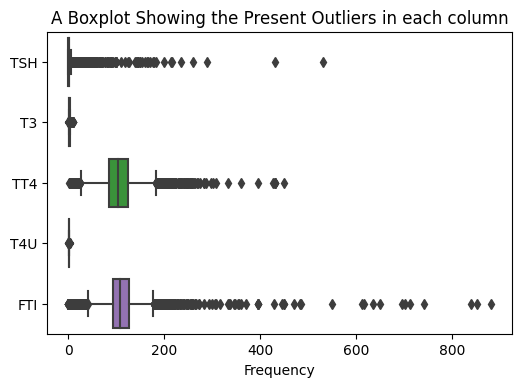

In [42]:
# Checking for outliers
columns = data[["TSH", "T3", "TT4", "T4U", "FTI"]]
plt.figure(dpi = 100)
ax = sns.boxplot(data = columns , orient="h")
plt.title('A Boxplot Showing the Present Outliers in each column')
plt.xlabel('Frequency')
plt.show()
#From the plot it is clear that most of the outliers are in the FTI column.

# Decision Trees

In [43]:
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [44]:
# Dropping the TBG column as most of the values are missing
data.drop('TBG', axis=1, inplace=True)

In [45]:
data

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,1,72.0,0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,1,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
3,1,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,1,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,0,58.0,1,0,0,0,0,0,0,0,0,0,0,0,1,5.8,1,1.7,1,86.0,1,0.91,1,95.0,0
3159,0,29.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.8,1,1.8,1,99.0,1,1.01,1,98.0,0
3160,0,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.2,1,0.6,1,71.0,1,0.68,1,104.0,0
3161,0,74.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.3,1,0.1,1,65.0,1,0.48,1,137.0,0


# `Random Forest`

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Splitting the independent and dependent variables
y =data['status']
X=data.drop('status', axis=1)

# Training the model using 80% of the data and testing it with 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
#Making predictions using the model
y_pred = model.predict(X_test)

In [108]:
# Getting the confusion matrix to evaluate the performance of the model
print(confusion_matrix(y_test,y_pred))

[[600   7]
 [  9  17]]


In [51]:
#Getting the Accuracy of the model

print("gradient_Accuracy:",metrics.accuracy_score(y_test, y_pred))
#The accuracy is 98.26% which is very high

gradient_Accuracy: 0.9826224328593997


In [52]:
#Assessing the Random forest model further
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.017377567140600316
Mean Squared Error: 0.017377567140600316
Root Mean Squared Error: 0.13182400062431848


In [53]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


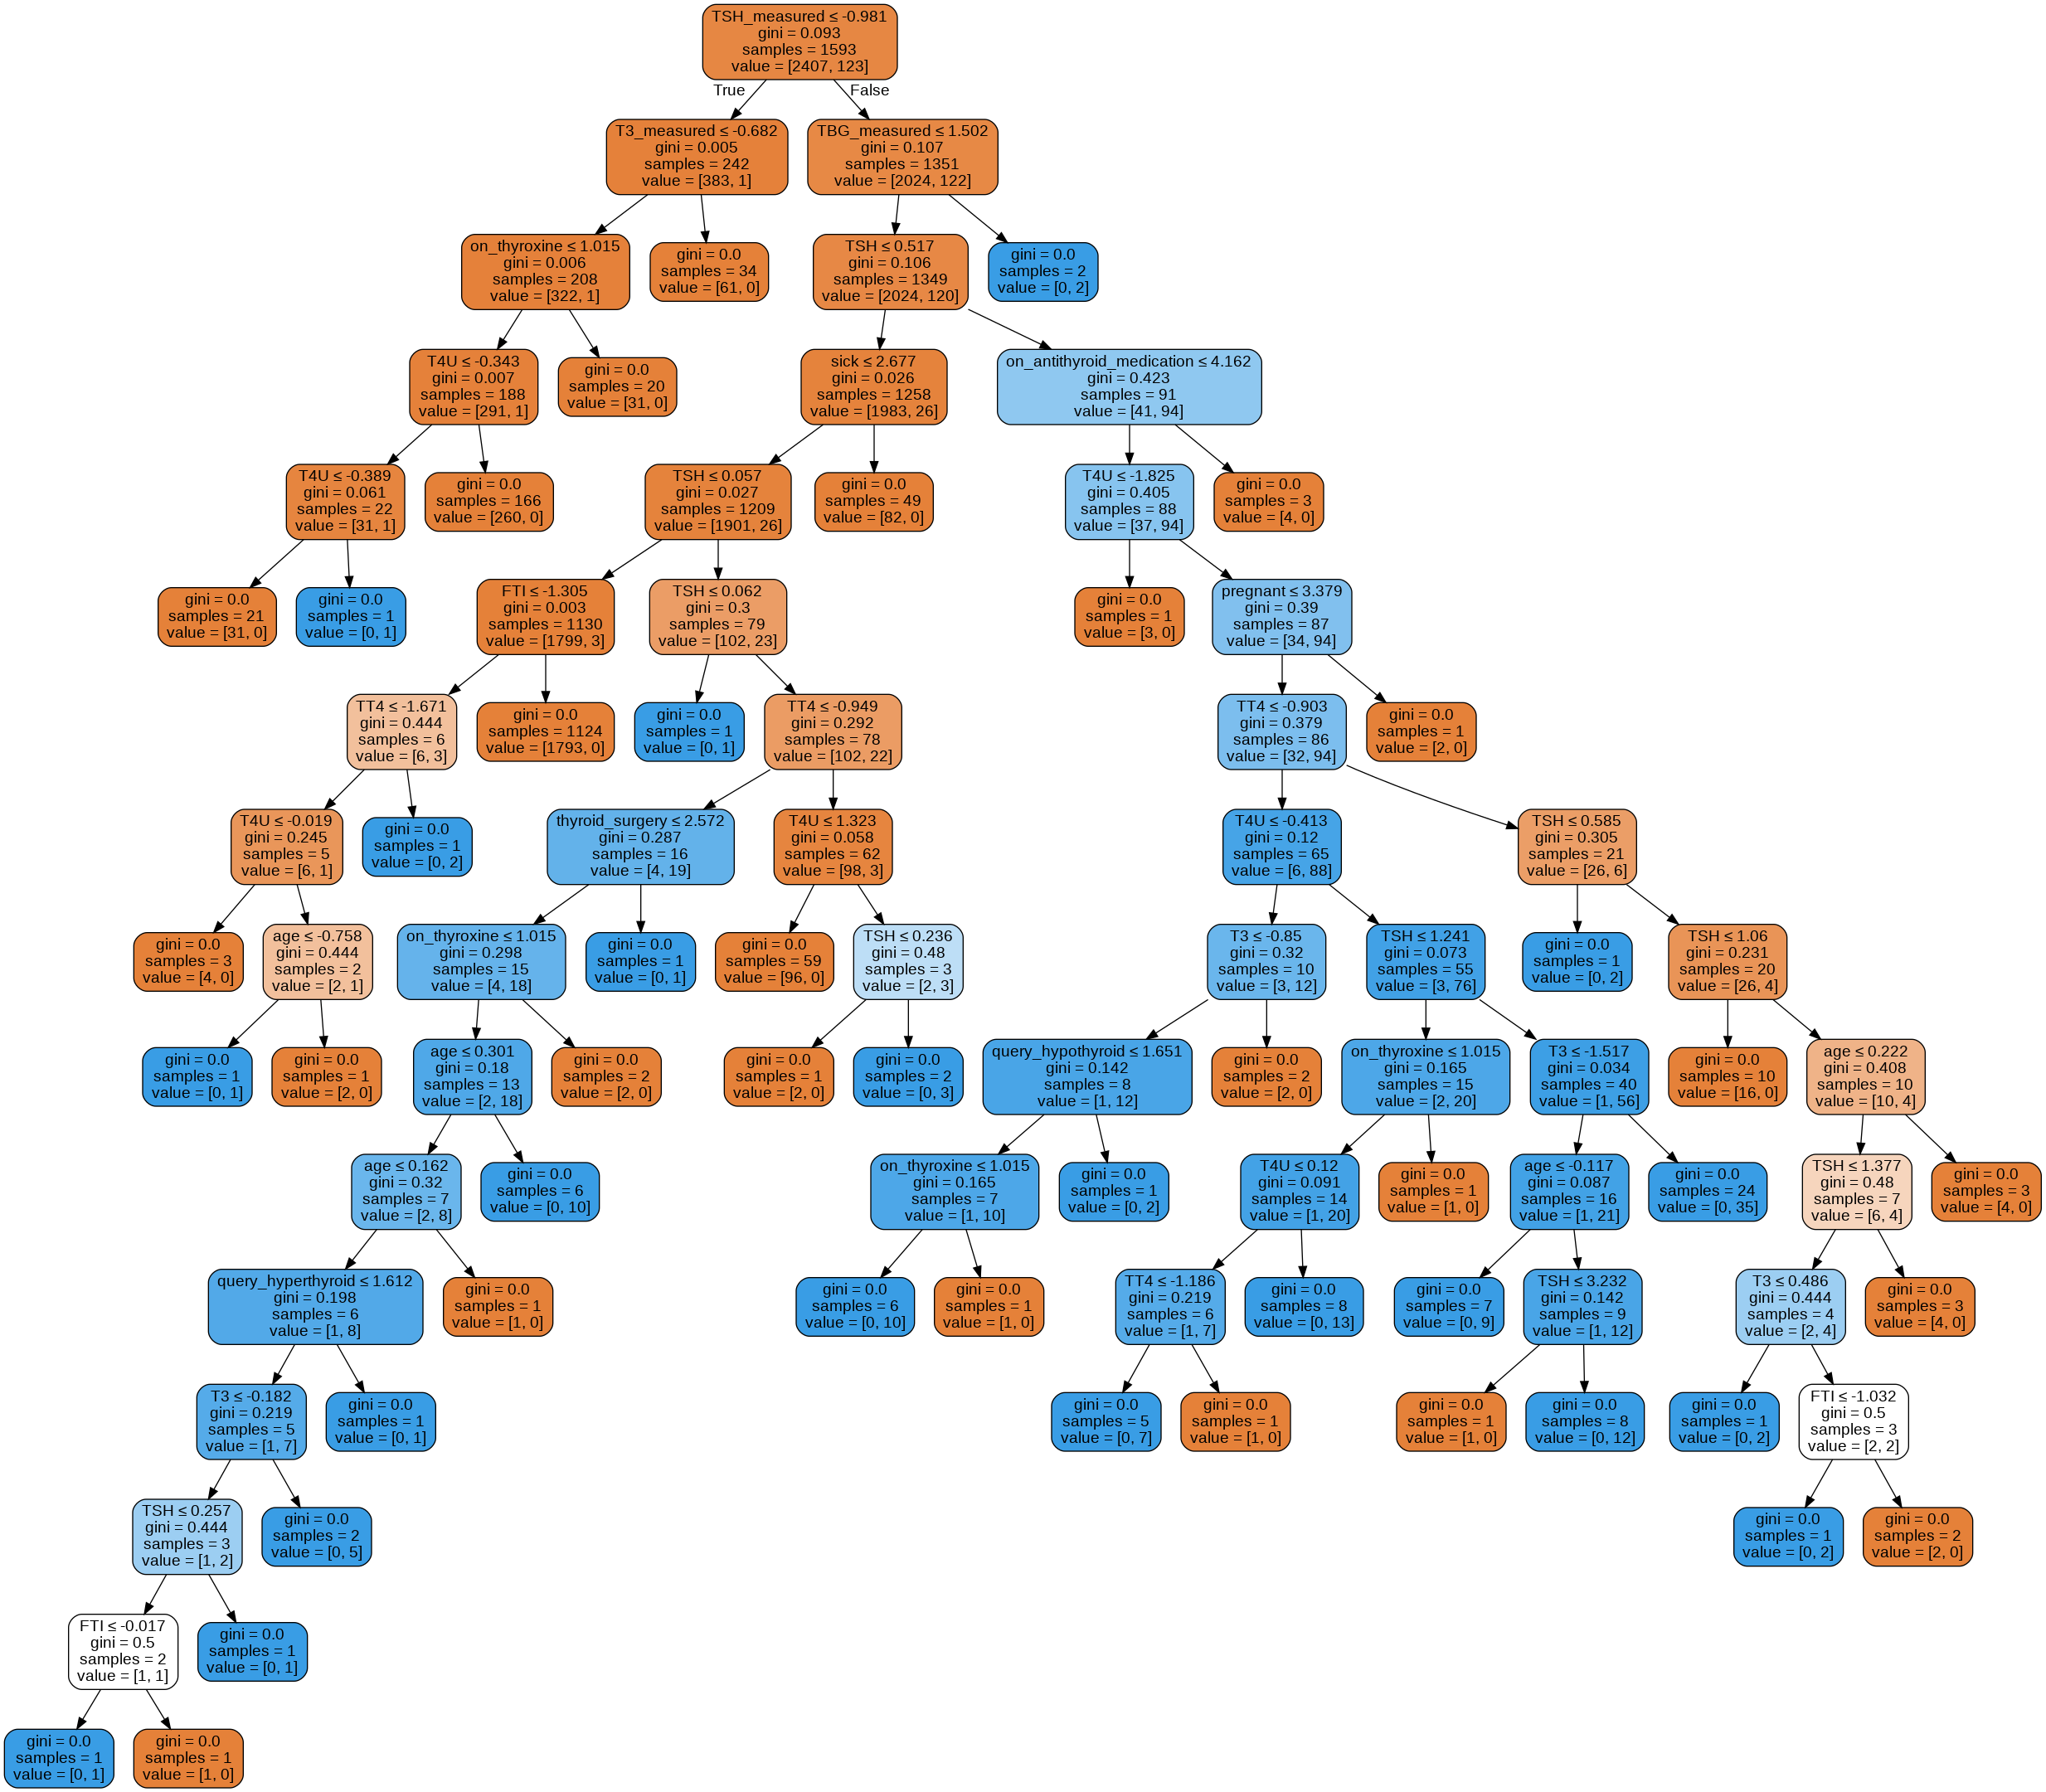

In [54]:
#Plotting the Decision tree
dot_data = StringIO()
# picking of a specific tree from the forest
tree = model.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid .png')
Image(graph.create_png())

In [55]:
#Getting the confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[601   6]
 [  5  21]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       607
           1       0.78      0.81      0.79        26

    accuracy                           0.98       633
   macro avg       0.88      0.90      0.89       633
weighted avg       0.98      0.98      0.98       633



In [56]:
# Finding the probability of getting a positive output
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
y_pos1 = model.predict_proba(X_test)[:, 1]


In [57]:
#Finding the AUC score
from sklearn.metrics import roc_auc_score, roc_curve
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pos1)}')
#The AUC Score is at 96.91%

ROC AUC Score: 0.9692371055633


# `Gradient Boosting`

In [58]:
#Fitting a gradient boost classifier
gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X_train, y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [59]:
# Making predictions
y_pred_gradient_boost = gradient_boost.predict(X_test)

In [60]:
# Getting the confusion matrix
print(confusion_matrix(y_test,y_pred_gradient_boost))

[[600   7]
 [  3  23]]


In [61]:
print(metrics.accuracy_score(y_test, y_pred_gradient_boost))

0.9842022116903634


In [62]:
# Finding out the possibility of getting a positive outcome using the gradient boost classifier
y_pos2 = gradient_boost.predict_proba(X_test)[:, 1]


In [63]:
# Finding out the AUC Score
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pos2)}')
#The AUC Score is 97.25%

ROC AUC Score: 0.9739576732986948


# `Adaboost`





In [64]:
#Fittinga base adaboost
ada_boost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
ada_boost_model.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [65]:
#Using the model to make predictions
y_pred_ada_boost = ada_boost_model.predict(X_test)


In [66]:
#Finding out the confusion matrix
print(confusion_matrix(y_test,y_pred_ada_boost))

[[596  11]
 [  3  23]]


In [67]:
# Finding out the likelihood of getting a positive output
y_pos3 = ada_boost_model.predict_proba(X_test)[:, 1]

In [68]:
#Finding out the AUC Score
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pos3)}')
#The score is at 93.40%

ROC AUC Score: 0.9332467367887467


The Gradient Boost has the highest AUC Score at 97.25%

# Finding out the Most important Features

> Indented block



In [69]:
#Finding out the importance of each feature 
importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
print(feature_importances)

[('age', 0.02), ('sex', 0.0), ('on_thyroxine', 0.03), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.02), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.01), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.01), ('TSH', 0.59), ('T3_measured', 0.0), ('T3', 0.02), ('TT4_measured', 0.0), ('TT4', 0.23), ('T4U_measured', 0.0), ('T4U', 0.04), ('FTI_measured', 0.0), ('FTI', 0.02), ('TBG_measured', 0.02)]


In [70]:
#Detecting which feature is important from the above output can be hard since they are not sorted in any order.We therefore go ahead to sort this in order to make our work easier.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = False)
[print('Variable: {:30} Importance: {}'.format(*pair)) for pair in feature_importances];
#From this analysis it is clear that the most importnt features are FTI,TT4,TSH,T4U and age.


Variable: sex                            Importance: 0.0
Variable: query_on_thyroxine             Importance: 0.0
Variable: thyroid_surgery                Importance: 0.0
Variable: query_hypothyroid              Importance: 0.0
Variable: query_hyperthyroid             Importance: 0.0
Variable: sick                           Importance: 0.0
Variable: tumor                          Importance: 0.0
Variable: lithium                        Importance: 0.0
Variable: goitre                         Importance: 0.0
Variable: T3_measured                    Importance: 0.0
Variable: TT4_measured                   Importance: 0.0
Variable: T4U_measured                   Importance: 0.0
Variable: FTI_measured                   Importance: 0.0
Variable: pregnant                       Importance: 0.01
Variable: TSH_measured                   Importance: 0.01
Variable: age                            Importance: 0.02
Variable: on_antithyroid_medication      Importance: 0.02
Variable: T3               

From the above analysis it is clear that the top five most important features are FTI,TT4,TSH,T4U and age.

# Hyper Parameter Tuning

In [73]:
parameters1 = {
    'max_depth': np.arange(40, 160, 20),
    'min_samples_leaf': [2,3],
    'n_estimators': [300, 400, 600, 800, 1000]}

In [76]:
#Cross Validation
grid_search = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = parameters1, cv = 3, n_jobs = -1, verbose = 0, scoring='roc_auc')

In [78]:
#Finding out the best parameterss
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 60, 'min_samples_leaf': 2, 'n_estimators': 400}

In [79]:
#Finding the score of the model with the tuned parameters
grid_search.best_score_
#The score improves from 97.25% to 98.33% after the tuning.

0.9832566594155588

## Support Vector Machine

In [ ]:
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
data_X = data.drop('status_new', axis=1)
y = data['status_new']

# Applying the reduction algorithm: PCA
pca = PCA(n_components=13).fit(data_X)
X = pca.transform(data_X)
X.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Polynomial

In [91]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=10,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
# predicting
y_pred_gpoly = polyclassifier.predict(X_test)

In [94]:
# model evaluation
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test, y_pred_gpoly))

print(confusion_matrix(y_test, y_pred_gpoly))
#The accuracy is at 96.21%

0.9620853080568721
[[599   8]
 [ 16  10]]


# RBF

In [96]:
# modelling using rbf
model = SVC(kernel= 'rbf')
model.fit(X_train,y_train.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [97]:
# predicting
y_pred_rbf = model.predict(X_test)

In [98]:
# model evaluation
print(accuracy_score(y_test, y_pred_rbf))

print(confusion_matrix(y_test, y_pred_rbf))
#The accuracy score is 97.16%

0.9715639810426541
[[601   6]
 [ 12  14]]


# Sigmoid

In [99]:
sigmoid = SVC(kernel='sigmoid', gamma='auto')

# fit train sets
sigmoid.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [100]:
# predict
y_pred_gsigmoid = sigmoid.predict(X_test)

In [101]:
# evaluate the model
print(accuracy_score(y_test, y_pred_gsigmoid))

print(confusion_matrix(y_test, y_pred_gsigmoid))
#The accuracy score is at 96.84%

0.9684044233807267
[[596  11]
 [  9  17]]


# Linear

In [89]:
Thyroid_model = SVC(kernel = 'linear')
# Train the model using the training set
Thyroid_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = Thyroid_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [104]:
# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy
#The accuracy of the model is at 97.47%

0.9747235387045814

# Remark
Under decision trees the Gradient boosting has the highest score whereas under the Support Vector Machine the Linear model has the highest accuracy score.

# Challenging the solution
a) Did we have the right question?
Yes.

b) Did we have the right data?
Yes the data was sufficient for the task at hand.

c) What can be done to improve the solution?
Further hyper parameter tuning